<a href="https://colab.research.google.com/github/AntonioZN23/Challenge1-AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [248]:
import pandas as pd
from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



La tienda que más vendió fue la(s) tienda 1 con un total de $1,150,880,400.00
La tienda que menos vendió fue la(s) tienda 4 con un total de $1,038,375,700.00



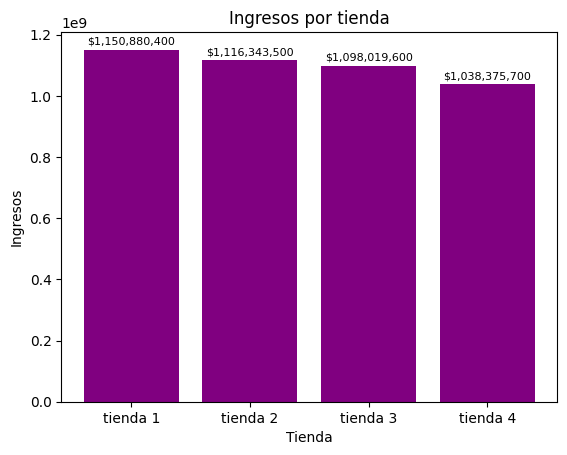

In [264]:
ingresos = {'tienda 1':float(tienda['Precio'].sum()),
'tienda 2':float(tienda2['Precio'].sum()),
'tienda 3':float(tienda3['Precio'].sum()),
'tienda 4':float(tienda4['Precio'].sum())}

#print(ingresos)

nombre,valor = ingresos.keys(),ingresos.values()
mayor_ganancia = []
menor_ganancia = []
max_ingresos = 0
min_ingresos = 9999999999999
for i in valor:
  if i >= max_ingresos:
    max_ingresos = i
  if i <= min_ingresos:
    min_ingresos = i
    tiendaMin = nombre

for j in ingresos.keys():
      if ingresos[j] == max_ingresos:
        mayor_ganancia.append(j)
      if ingresos[j] == min_ingresos:
        menor_ganancia.append(j)

print("La tienda que más vendió fue la(s)", ", ".join(mayor_ganancia), f"con un total de ${max_ingresos:,.2f}")
print("La tienda que menos vendió fue la(s)", ", ".join(menor_ganancia), f"con un total de ${min_ingresos:,.2f}\n")

fig, ax = plt.subplots()
bars = ax.bar(ingresos.keys(), ingresos.values(), color='purple')

for bar in bars:
    altura = bar.get_height()
    texto = f"${altura:,.0f}"
    ax.text(bar.get_x() + bar.get_width()/2,altura + (altura * 0.01), texto, ha='center', va='bottom', fontsize=8)

plt.title('Ingresos por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos')
plt.show()

# 2. Ventas por categoría

In [319]:
def ventas_por_categoria(valores_tienda):
  categorias = {x for x in valores_tienda['Categoría del Producto']}
  ventas_por_categoria = {x:int(valores_tienda['Categoría del Producto'].value_counts()[x]) for x in categorias}

  return ventas_por_categoria

def grafico_pastel(x):
  plt.pie(x[1].values(),labels=x[1].keys(),autopct="%0.1f %%")
  plt.title(f'Categorias mas vendidas por {x[0]}')
  plt.axis("equal")
  plt.show()

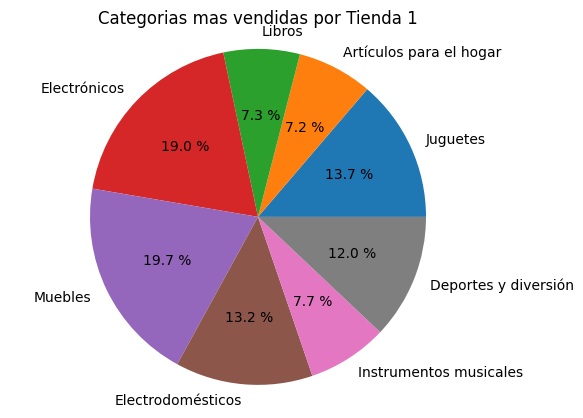

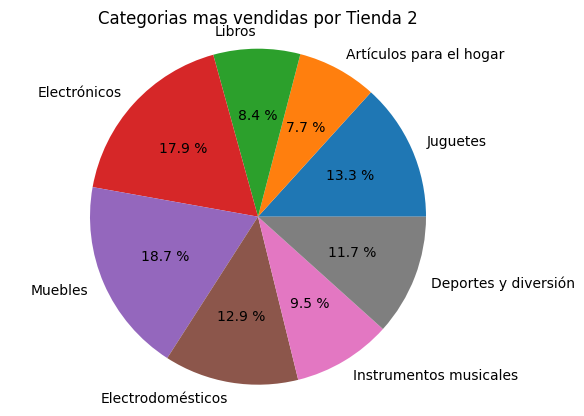

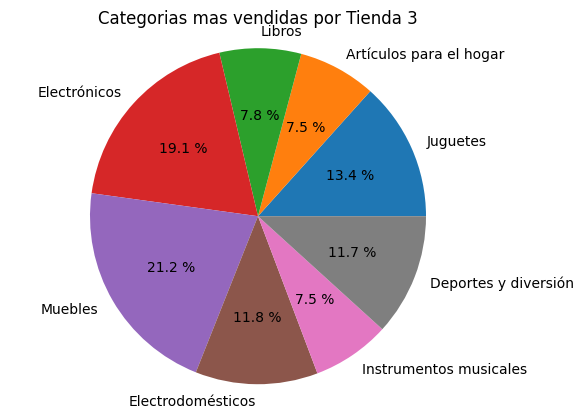

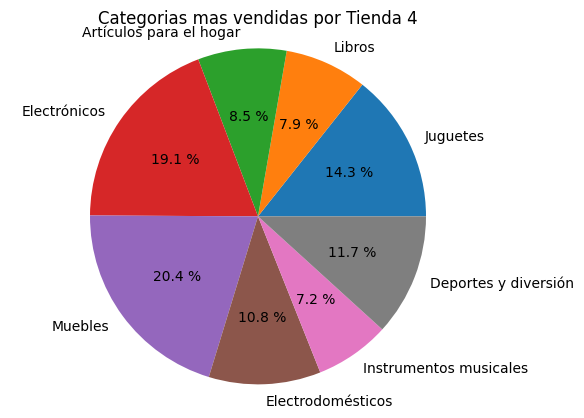

In [320]:
ventas_de_tiendas_por_categoria = []

ventas_de_tiendas_por_categoria.append(('Tienda 1',ventas_por_categoria(tienda)))
ventas_de_tiendas_por_categoria.append(('Tienda 2',ventas_por_categoria(tienda2)))
ventas_de_tiendas_por_categoria.append(('Tienda 3',ventas_por_categoria(tienda3)))
ventas_de_tiendas_por_categoria.append(('Tienda 4',ventas_por_categoria(tienda4)))

for i in range(len(ventas_de_tiendas_por_categoria)):
  grafico_pastel(ventas_de_tiendas_por_categoria[i])
  print('\n\n')

# 3. Calificación promedio de la tienda


{'Tienda 1': 3.98, 'Tienda 2': 4.04, 'Tienda 3': 4.05, 'Tienda 4': 4.0}


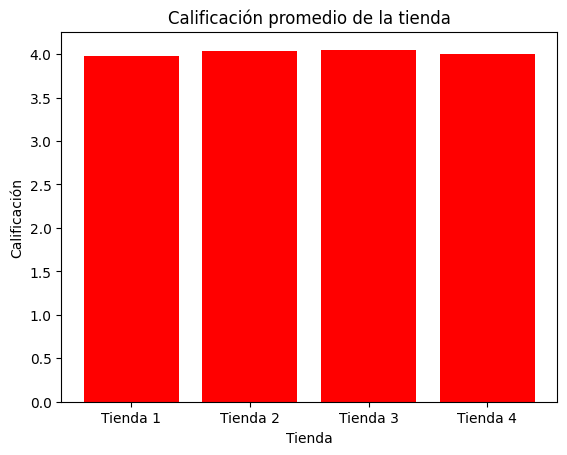

In [150]:
calificacion_promedio = {'Tienda 1':round(float(tienda['Calificación'].mean()),2),
'Tienda 2':round(float(tienda2['Calificación'].mean()),2),
'Tienda 3':round(float(tienda3['Calificación'].mean()),2),
'Tienda 4':round(float(tienda4['Calificación'].mean()),2)}

print(calificacion_promedio)

plt.bar(calificacion_promedio.keys(), calificacion_promedio.values(), color = 'red')
plt.title('Calificación promedio de la tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.show()

# 4. Productos más y menos vendidos

In [155]:
def find_max(x):
  llaves,valores = x.keys(),x.values()
  val_maximo = 0
  for i in valores:
    if i >= val_maximo:
      val_maximo = i
  productos_trending = []
  for i in llaves:
    if x[i] == val_maximo:
      productos_trending.append(i)
  return productos_trending,val_maximo

def find_min(x):
  llaves,valores = x.keys(),x.values()
  val_minimo = 99999999999999
  for i in valores:
    if i <= val_minimo:
      val_minimo = i
  productos_no_trending = []
  for i in llaves:
    if x[i] == val_minimo:
      productos_no_trending.append(i)
  return productos_no_trending,val_minimo

def minimos_y_maximos(y):
    articulos = {x for x in y['Producto']}
    productos = {x:int(y['Producto'].value_counts()[x]) for x in articulos}

    productos_mas_vendidos=find_max(productos)
    productos_menos_vendidos=find_min(productos)

    print(f'Productos mas vendidos: {productos_mas_vendidos[0]} con un total de ventas de {productos_mas_vendidos[1]}')
    print(f'Productos menos vendidos: {productos_menos_vendidos[0]} con un total de ventas de {productos_menos_vendidos[1]}\n')

    plt.bar(productos_mas_vendidos[0], productos_mas_vendidos[1], color = 'red')
    plt.title('Articulos más vendidos de la tienda')
    plt.xlabel('Artículo')
    plt.ylabel('Total de ventas')
    plt.show()

Productos mas vendidos: ['TV LED UHD 4K', 'Armario', 'Microondas'] con un total de ventas de 60
Productos menos vendidos: ['Auriculares con micrófono', 'Celular ABXY'] con un total de ventas de 33



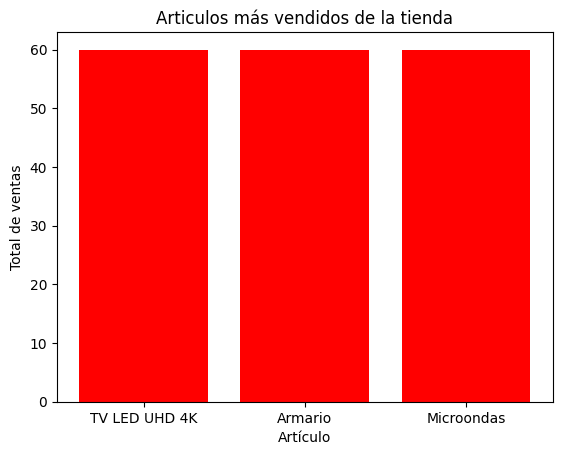

Productos mas vendidos: ['Iniciando en programación'] con un total de ventas de 65
Productos menos vendidos: ['Juego de mesa'] con un total de ventas de 32



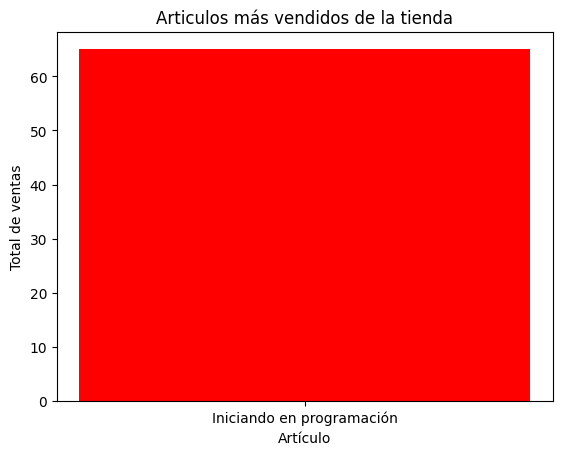

Productos mas vendidos: ['Kit de bancas'] con un total de ventas de 57
Productos menos vendidos: ['Bloques de construcción'] con un total de ventas de 35



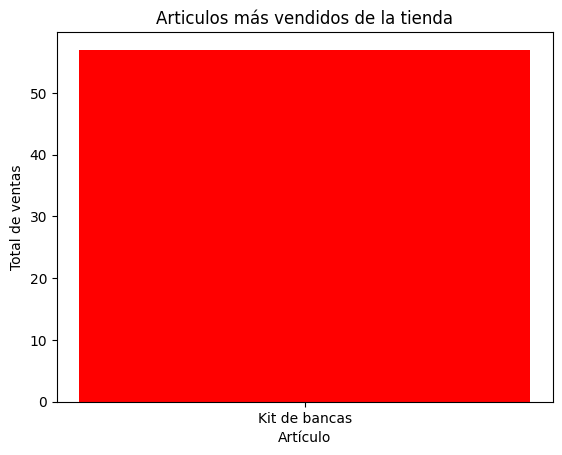

Productos mas vendidos: ['Cama box'] con un total de ventas de 62
Productos menos vendidos: ['Guitarra eléctrica'] con un total de ventas de 33



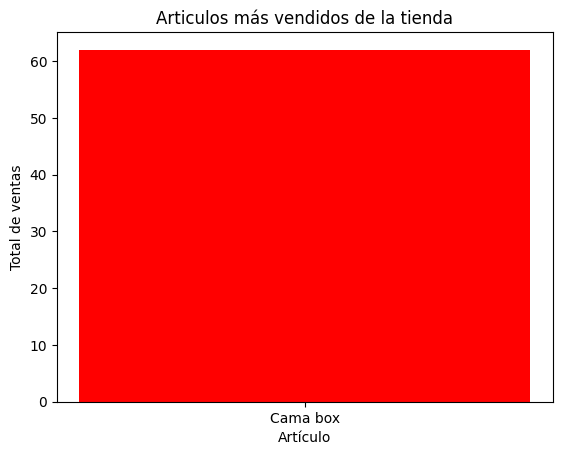

In [156]:
minimos_y_maximos(tienda)
minimos_y_maximos(tienda2)
minimos_y_maximos(tienda3)
minimos_y_maximos(tienda4)

In [352]:
def mas_vendidos(x):
  llaves,valores = x.keys(),x.values()
  ordenados = list(valores)
  ordenados.sort()
  ordenados = ordenados[-5:]

  productos = {}
  for i in range(0,5):
    for j in llaves:
      if x[j] == ordenados[i]:
        productos[j]=x[j]
        del x[j]
        break

  return productos

def menos_vendidos(x):
  llaves,valores = x.keys(),x.values()
  ordenados = list(valores)
  ordenados.sort()
  ordenados = ordenados[:5]

  productos = {}
  for i in range(0,5):
    for j in llaves:
      if x[j] == ordenados[i]:
        productos[j]=x[j]
        del x[j]
        break

  return productos

def graficar(x,y,color_deseado):
  fig, ax = plt.subplots()
  bars = ax.bar(x.keys(), x.values(), color=color_deseado)

  for bar in bars:
      altura = bar.get_height()
      texto = f"{altura:,.0f} unidades"
      ax.text(bar.get_x() + bar.get_width()/2,altura + (altura * 0.01), texto, ha='center', va='bottom', fontsize=8)

  plt.title('Articulos más vendidos de la tienda')
  plt.xlabel('Artículo')
  plt.ylabel('Total de ventas')
  plt.xticks(rotation=45)
  plt.show()

def top_cinco(y,color_deseado):
    articulos = {x for x in y['Producto']}
    productos = {x:int(y['Producto'].value_counts()[x]) for x in articulos}

    top5_mas_vendidos=mas_vendidos(productos)
    valores_top5_mas_venidos = [str(num) for num in list(top5_mas_vendidos.values())]
    print(f'Top 5 productos mas vendidos: {", ".join(list(top5_mas_vendidos.keys()))} con un total de ventas de {", ".join(valores_top5_mas_venidos)} respectivamente')

    top5_menos_vendidos=menos_vendidos(productos)
    valores_top5_menos_venidos = [str(num) for num in list(top5_menos_vendidos.values())]
    print(f'Top 5 productos menos vendidos: {", ".join(list(top5_menos_vendidos.keys()))} con un total de ventas de {", ".join(valores_top5_menos_venidos)} respectivamente\n')

    graficar(top5_mas_vendidos,top5_menos_vendidos,color_deseado)


Tienda 1

Top 5 productos mas vendidos: Mesa de noche, Secadora de ropa, TV LED UHD 4K, Armario, Microondas con un total de ventas de 56, 58, 60, 60, 60 respectivamente
Top 5 productos menos vendidos: Auriculares con micrófono, Celular ABXY, Olla de presión, Pandereta, Mochila con un total de ventas de 33, 33, 35, 36, 39 respectivamente



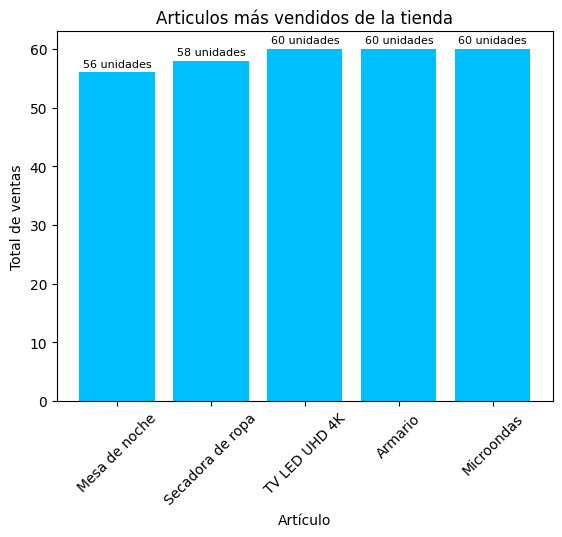


Tienda 2

Top 5 productos mas vendidos: Pandereta, Guitarra acústica, Batería, Microondas, Iniciando en programación con un total de ventas de 58, 58, 61, 62, 65 respectivamente
Top 5 productos menos vendidos: Juego de mesa, Mesa de comedor, Impresora, Sillón, Auriculares con un total de ventas de 32, 34, 34, 35, 37 respectivamente



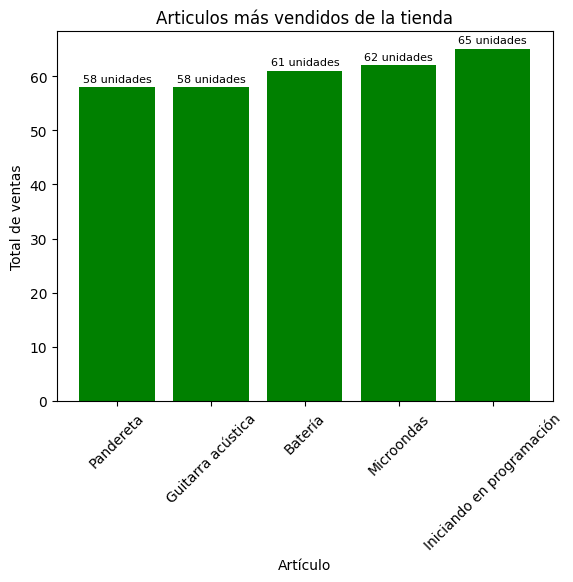


Tienda 3

Top 5 productos mas vendidos: Mesa de noche, Set de ollas, Cama king, Mesa de comedor, Kit de bancas con un total de ventas de 55, 55, 56, 56, 57 respectivamente
Top 5 productos menos vendidos: Bloques de construcción, Set de vasos, Mochila, Microondas, Vaso térmico con un total de ventas de 35, 36, 36, 36, 38 respectivamente



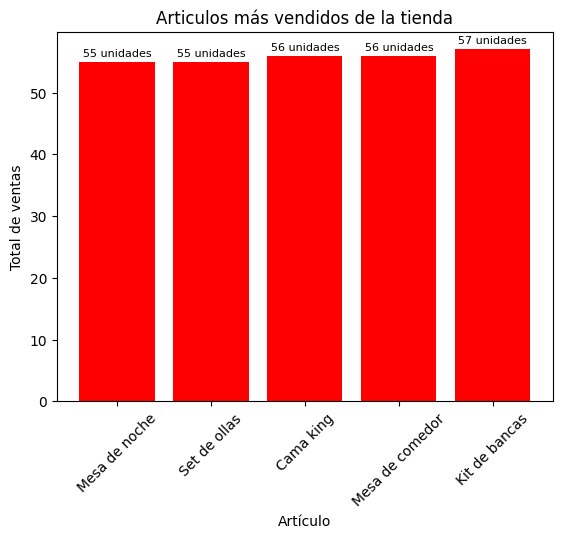


Tienda 4

Top 5 productos mas vendidos: Mesa de noche, Cama king, Dashboards con Power BI, Cubertería, Cama box con un total de ventas de 55, 56, 56, 59, 62 respectivamente
Top 5 productos menos vendidos: Guitarra eléctrica, Armario, Guitarra acústica, Refrigerador, Lavadora de ropa con un total de ventas de 33, 34, 37, 38, 38 respectivamente



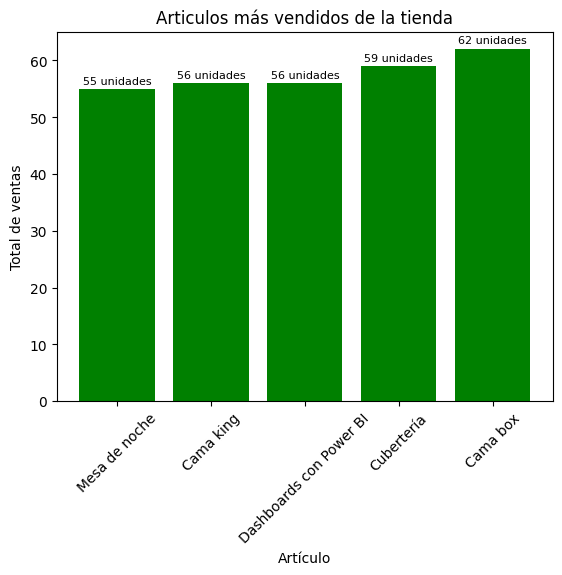

In [353]:
print("\nTienda 1\n")
top_cinco(tienda,'deepskyblue')

print("\nTienda 2\n")
top_cinco(tienda2,'green')

print("\nTienda 3\n")
top_cinco(tienda3,'red')

print("\nTienda 4\n")
top_cinco(tienda4,'green')

# 5. Envío promedio por tienda

{'Tienda 1': 26018.61, 'Tienda 2': 25216.24, 'Tienda 3': 24805.68, 'Tienda 4': 23459.46}


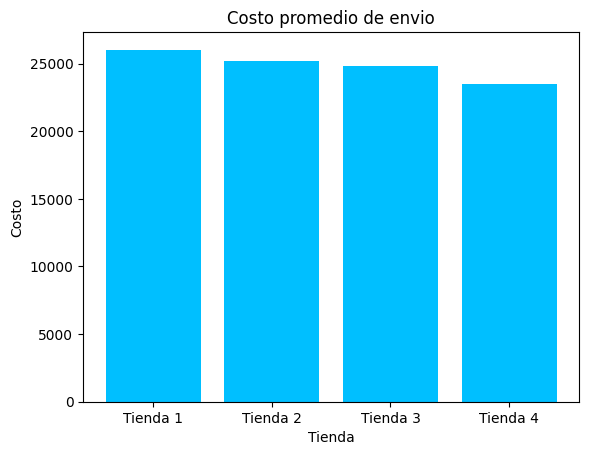

In [243]:
valor_envio_promedio = {'Tienda 1':round(float(tienda['Costo de envío'].mean()),2),
'Tienda 2':round(float(tienda2['Costo de envío'].mean()),2),
'Tienda 3':round(float(tienda3['Costo de envío'].mean()),2),
'Tienda 4':round(float(tienda4['Costo de envío'].mean()),2)}

print(valor_envio_promedio)

plt.bar(valor_envio_promedio.keys(), valor_envio_promedio.values(), color='deepskyblue')
plt.title('Costo promedio de envio')
plt.xlabel('Tienda')
plt.ylabel('Costo')
plt.show()